In [1]:
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
file_path = 'Elon_musk.csv'
data = pd.read_csv("E:\DS Assignment\Elon_musk.csv", encoding='Latin-1')


In [3]:
print(data.head())
tweet_column_name = 'Text'


   Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score


In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(Text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(Text)

    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [6]:
data['Sentiment'] = data['Text'].apply(analyze_sentiment)


In [8]:
print("\nSentiment Analysis Results:")
print(data[['Text', 'Sentiment']].head())



Sentiment Analysis Results:
                                                Text Sentiment
0                             @kunalb11 Im an alien   neutral
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   neutral
2                @joerogan @Spotify Great interview!  positive
3                    @gtera27 Doge is underestimated  negative
4  @teslacn Congratulations Tesla China for amazi...  positive


In [9]:
stop_words = set(stopwords.words('english'))


In [10]:
def preprocess_text(Text):
    # Remove special characters and links
    Text = re.sub(r"http\S+|www\S+|https\S+", "", Text, flags=re.MULTILINE)
    Text = re.sub(r'\@\w+|\#', "", Text)
    # Convert to lowercase
    Text = Text.lower()
    # Remove stop words
    Text = ' '.join([word for word in Text.split() if word not in stop_words])
    return Text



In [11]:
data['Processed_Text'] = data['Text'].apply(preprocess_text)


In [12]:
print("\nProcessed Text (after removing stop words):")
print(data[['Text', 'Processed_Text']].head())



Processed Text (after removing stop words):
                                                Text  \
0                             @kunalb11 Im an alien   
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                @joerogan @Spotify Great interview!   
3                    @gtera27 Doge is underestimated   
4  @teslacn Congratulations Tesla China for amazi...   

                                      Processed_Text  
0                                          im alien  
1    ray tracing cyberpunk hdr next-level. tried it?  
2                                   great interview!  
3                                doge underestimated  
4  congratulations tesla china amazing execution ...  


In [13]:
all_tweets = ' '.join(data['Processed_Text'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_tweets)


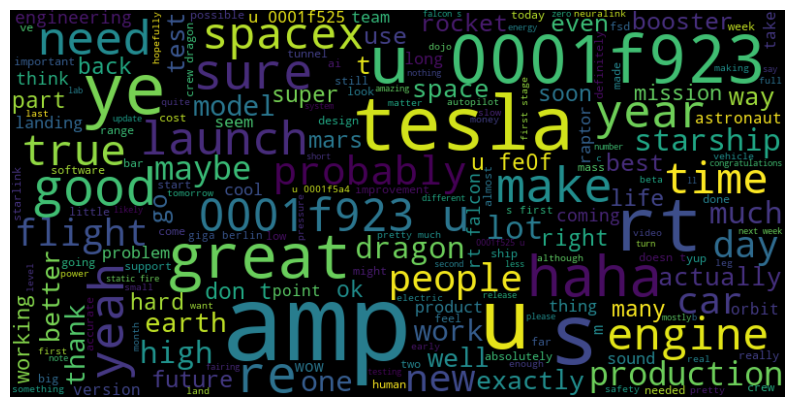

In [14]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [16]:
import string 
no_punc_all_tweets=all_tweets.translate(str.maketrans('','',string.punctuation))
no_punc_all_tweets

'i\x92m alien ray tracing cyberpunk hdr nextlevel tried it great interview doge underestimated congratulations tesla china amazing execution last year next even more happy new year ox frodo underdoge thought would fail all haha thanks  indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse  it\x92s getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account u0001f923u0001f923 true power haha crypto wallet won\x92t give private keys avoided costs app sucks rt  nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it\x92s meant price countries difference taxes amp shipping inte

In [18]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_all_tweets)
len(text_tokens)
print(text_tokens[0:60])

['i\x92m', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'it', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'more', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'all', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issues', 'sentencing']


In [20]:
my_stop_words=stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('as')
my_stop_words.append('in')

In [21]:
len(my_stop_words)


182

In [22]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
no_stop_tokens
len(no_stop_tokens)
print(no_stop_tokens[0:50])


['i\x92m', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin']


In [23]:
#normalize the data
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['i\x92m', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin']


In [24]:
doc = ' '.join(lower_words)
print(doc)

im alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse its getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account u0001f923u0001f923 true power haha crypto wallet wont give private keys avoided costs app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g its meant price countries difference taxes amp shipping intended earth may ideas apply m

In [25]:
#lemmatization
from nltk.stem import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()


In [26]:
lemmas=[]
for token in doc.split():
    lemmas.append(Lemmatizer.lemmatize(token))
    
print(lemmas)


['i\x92m', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thanks', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923u0001f923', 'true', 'power', 'haha', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'key', 'avoided', 'cost', 'app', 'suck', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink'

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)
X
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(30)



,0
005,0
10,1
100,2
1000,3
10000,4
100kg,5
100m,6
107,7
10pm,8
10x,9


In [31]:
#bigrams and trigams
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,1),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(data)
bow_matrix_ngram
feature_names = vectorizer.get_feature_names_out()

print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())


['processed_text' 'sentiment' 'text' 'unnamed']
[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
